In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://www.openintro.org/stat/data/nc.csv")

In [3]:
data.sample(10)

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
186,22.0,21,younger mom,40.0,full term,15.0,married,22.0,6.94,not low,female,nonsmoker,not white
939,42.0,37,mature mom,41.0,full term,16.0,not married,38.0,7.00,not low,female,nonsmoker,white
196,22.0,21,younger mom,37.0,full term,19.0,married,30.0,5.44,low,female,nonsmoker,not white
171,19.0,20,younger mom,34.0,premie,13.0,married,6.0,4.50,low,male,nonsmoker,not white
535,30.0,27,younger mom,39.0,full term,15.0,not married,22.0,8.38,not low,male,smoker,white
768,NaN,32,younger mom,37.0,full term,8.0,married,30.0,6.81,not low,female,nonsmoker,not white
473,NaN,26,younger mom,39.0,full term,6.0,married,20.0,5.88,not low,male,nonsmoker,not white
263,23.0,22,younger mom,37.0,full term,10.0,not married,30.0,6.38,not low,male,nonsmoker,not white
12,NaN,16,younger mom,40.0,full term,4.0,married,12.0,6.00,not low,female,nonsmoker,not white
723,32.0,31,younger mom,37.0,full term,12.0,not married,29.0,6.50,not low,female,nonsmoker,white


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Gender vs Habit')

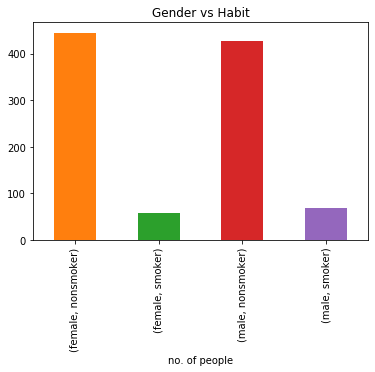

In [15]:
data.groupby('gender').habit.value_counts().plot(kind = 'bar', colors = ['C1','C2','C3', 'C4'])
plt.xlabel('no. of people')
plt.title('Gender vs Habit')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Gender vs Smoker')

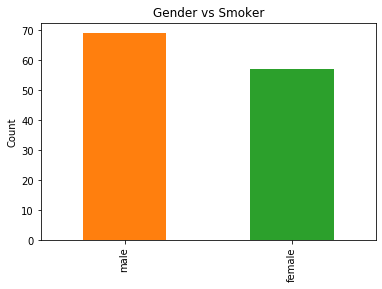

In [24]:
data[data.habit == 'smoker'].gender.value_counts().plot(kind = 'bar', colors = ['C1', 'C2'])

plt.ylabel('Count')
plt.title('Gender vs Smoker')

In [29]:
feature = data.drop(columns = 'habit')
target = data.habit

In [54]:
target.fillna('smoker', inplace = True)

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder


In [30]:
cat_col = feature.select_dtypes(include = 'O')
int_col = feature.select_dtypes(exclude= 'O')

In [ ]:
SelectKBest()

In [81]:
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),SelectKBest(k = 3, score_func = f_classif), OrdinalEncoder())
int_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'),SelectKBest(n = 3, score_func = f_classif), MinMaxScaler())

TypeError: __init__() got an unexpected keyword argument 'n'

In [47]:
preprocessor = make_column_transformer(
(cat_pipeline, cat_col.columns),
(int_pipeline, int_col.columns))

In [48]:
from sklearn.model_selection import train_test_split

In [55]:
trainX, testX, trainY, testY = train_test_split(feature, target)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
pipeline = make_pipeline(preprocessor, LogisticRegression())

In [58]:
pipeline.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                    

In [59]:
pipeline.score(testX, testY)

0.884

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
pipeline2 = make_pipeline(preprocessor,DecisionTreeClassifier())

In [62]:
pipeline2.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                    

In [64]:
pipeline2.score(testX, testY)

0.772

In [65]:
pipeline_rad = make_pipeline(preprocessor, RandomForestClassifier())

In [66]:
pipeline_rad.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                    

In [68]:
pipeline_rad.score(testX, testY)

0.876

In [69]:
pipeline_nai = make_pipeline(preprocessor, GaussianNB())

In [70]:
pipeline_nai.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                    

In [71]:
pipeline_nai.score(testX,testY)

0.868

In [72]:
data.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


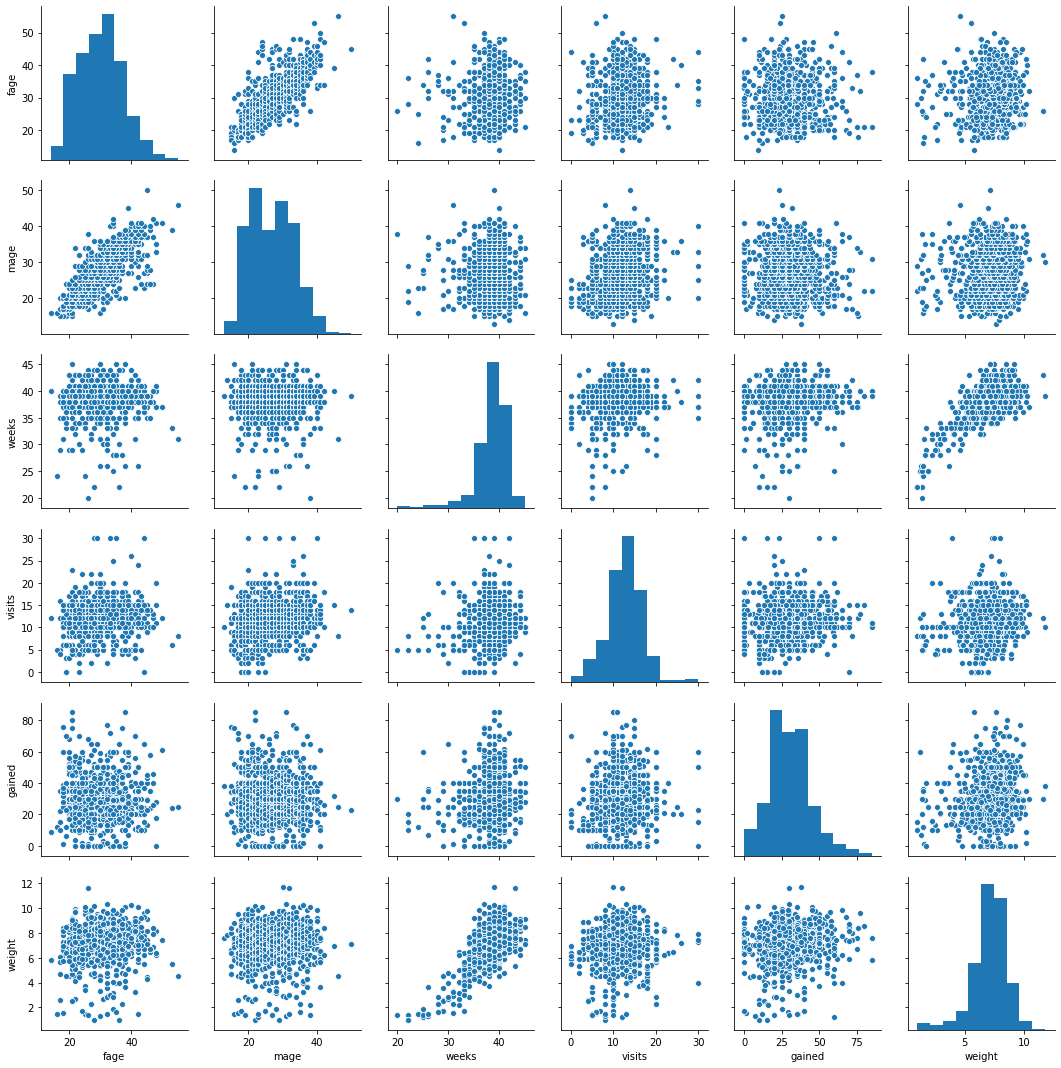

In [74]:
sns.pairplot(data)

In [79]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

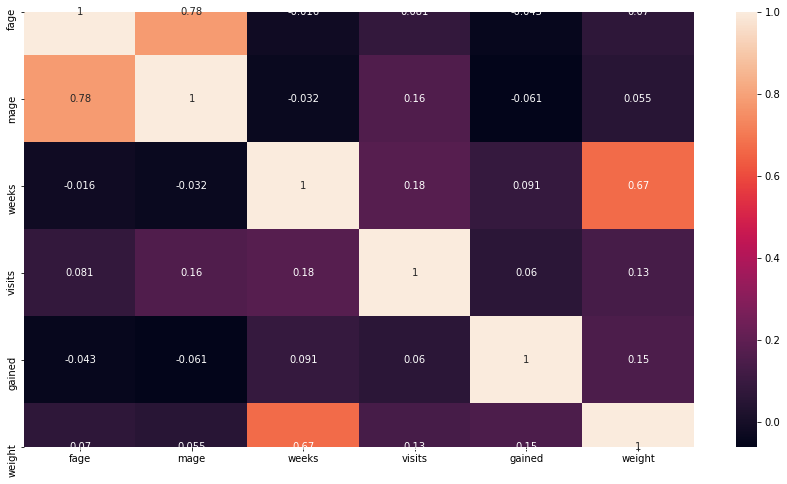

In [76]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot= True)